# Sp23-112-Hw05-Python problems

## Question 1: Ehrenfests' Fleas

### Learning objectives
In this question you will:

- study a Markov chain and analyse its properties
- verify the analysed behaviour by comparing to Monte Carlo simulations
- observe the emergence of a second law of thermodynamics


Ehrenfest has two dogs upon which $N$ fleas are distributed: $N_1$ on dog 1, and $N_2 = N - N_1$ on dog 2. We consider the microstate of the system to be $x = \{ x_1, x_2, ... x_N \}$, where $x_i = 1 ,  2$ indicates whether the $i$-th flea is on the first or second dog. In this sense, the number of fleas on each dog $N_1 + N_2 = N$ is a macrostate. This is a system whose statistics you have now studied to death in another guise: you should know the resulting multiplicity $g(N_1, N)$ and why it limits to a Gaussian when $N$ is large.

However, in this problem we are going to study dynamics. You can think of it as a very crude version of the Newton's laws or Schroedinger equation which  govern  the microstates of real physical systems.

In [46]:
import numpy as np
from matplotlib import pyplot as plt
import random

### 1a. 

Consider the following random process. At each point in time,  randomly pick one of the $N$ fleas, and have it hop to the opposite dog. If $x(t)$ is the configuration of fleas at time $t$, this defines a probabilistic process for updating the flea configuration, $x(t) \to x(t+1)$. Write a function which takes as input length-$N$ array $x$, and which returns an updated configuration of fleas. 

In [47]:
def hop_flea(x):

    N = len(x)

    #do a random hop

    return x

In [48]:
def hop_flea(x):

    N = len(x)
    i = random.randint(0, N-1)  # pick a random flea
    x[i] = 1 - x[i]            # hop the flea from dog 1 to dog 2
    return x

#x[i] is 0 if flea i is on the first dog and 1 if flea i is on the second dog.

### 1b. 

Starting from a configuration $x(0)$ in which all $N = 50$ fleas are on dog 1, use a for loop to succesively `hop_fleas` for $T = 20N$ time steps. At each iteration, log the number of fleas on dog 1, $N_1(t)$. 
Plot $N_1(t)$ vs $t$. How would you describe its behavior? Letting $S = \ln g(N_1, N)$ be the dimensionless version of entropy, produce a second plot showing $S(t)$. 

Repeat for $N=100,200,500$. Comment on the statement "entropy always increases" as it applies to this problem and to macroscopic systems.

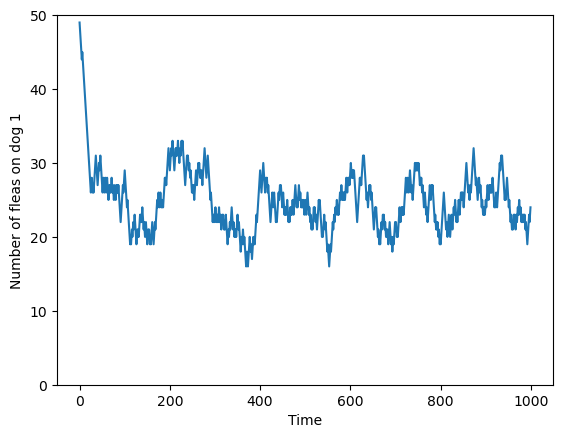

In [49]:
N = 50  # number of fleas
x = [1]*N  # initial configuration (all on first dog)
T=20*N
N1 = np.ones(T)

for t in range(0, T):
    x = hop_flea(x)
    N1[t] = np.sum(x)
plt.plot(range(T), N1)
plt.xlabel('Time')
plt.ylabel('Number of fleas on dog 1')
plt.ylim(0, N)
plt.show()

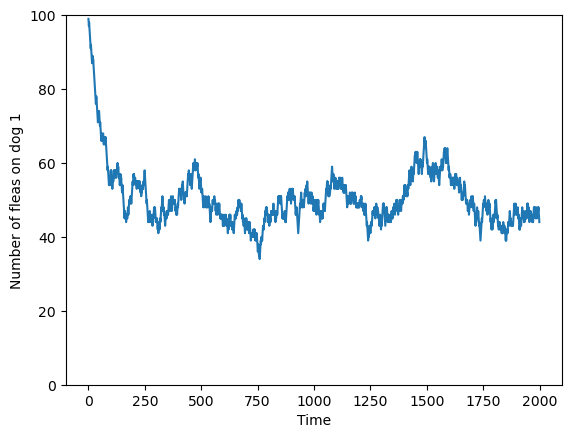

In [50]:
N = 100  # number of fleas
x = [1]*N  # initial configuration (all on first dog)
T=20*N
N1 = np.ones(T)

for t in range(0, T):
    x = hop_flea(x)
    N1[t] = np.sum(x)
plt.plot(range(T), N1)
plt.xlabel('Time')
plt.ylabel('Number of fleas on dog 1')
plt.ylim(0, N)
plt.show()

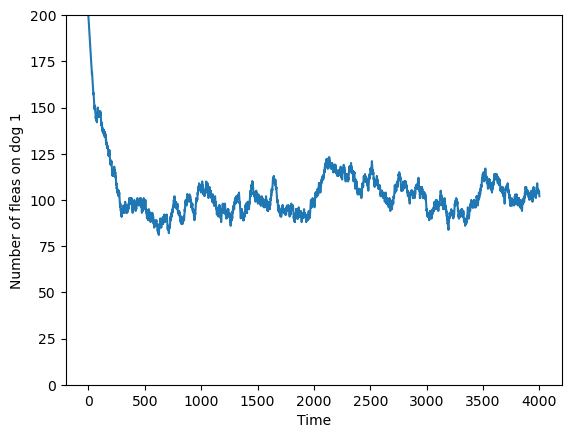

In [51]:
N = 200  # number of fleas
x = [1]*N  # initial configuration (all on first dog)
T=20*N
N1 = np.ones(T)

for t in range(0, T):
    x = hop_flea(x)
    N1[t] = np.sum(x)
plt.plot(range(T), N1)
plt.xlabel('Time')
plt.ylabel('Number of fleas on dog 1')
plt.ylim(0, N)
plt.show()

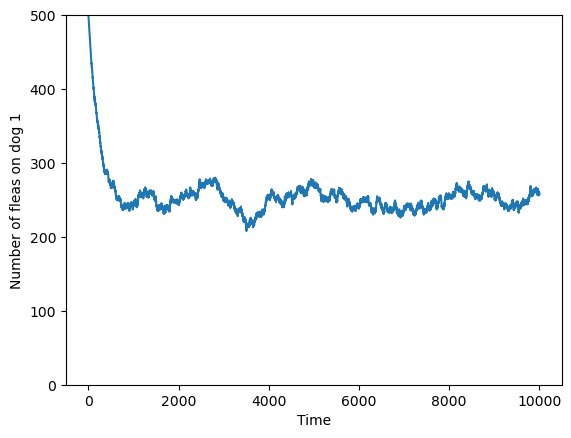

In [52]:
N = 500  # number of fleas
x = [1]*N  # initial configuration (all on first dog)
T=20*N
N1 = np.ones(T)

for t in range(0, T):
    x = hop_flea(x)
    N1[t] = np.sum(x)
plt.plot(range(T), N1)
plt.xlabel('Time')
plt.ylabel('Number of fleas on dog 1')
plt.ylim(0, N)
plt.show()

### 1c. 

Now, starting from the same $x(0)$ for $N=50$, evolve for $T=10000$ steps, logging $N_1(t)$ as before. 
Plot a histogram of $N_1(t)$ for the last $T/2$ time steps. Using what you know about random walks / binary systems, compare it against the expected probability distrubiton $P(N_1, N)$ (either the exact one, or within the Gaussian approximation.)   Why did I have you produce the histogram using only steps $T/2 < t  \leq T$, rather than including the first $T/2$ steps?

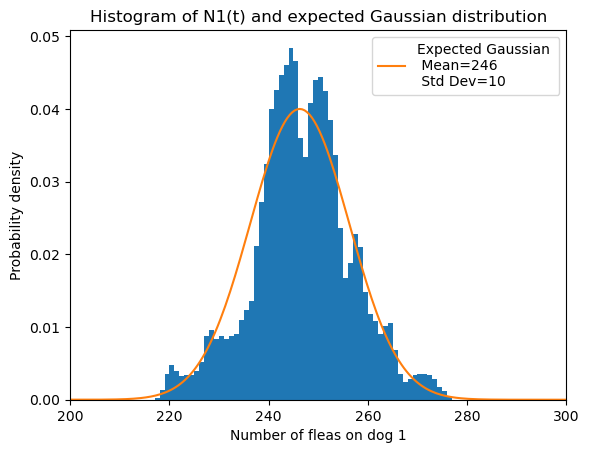

In [75]:
N = 500  # number of fleas
x = [1]*N  # initial configuration (all on first dog)
T=10000
N1 = np.ones(T)

for t in range(0, T):
    x = hop_flea(x)
    N1[t] = np.sum(x)
    

# extract the values of N1 for the last T/2 time steps
N1_last_half = N1[T//2:]

import numpy as np
from scipy.stats import norm

# extract the values of N1 for the last T/2 time steps
N1_last_half = N1[T//2:]

# calculate the mean and standard deviation of N1
mu = np.mean(N1_last_half)
sigma = np.std(N1_last_half)

# create a normal distribution object with mean mu and standard deviation sigma
dist = norm(mu, sigma)

# generate an array of x values for the plot
x = np.linspace(0, N, 1000)

# calculate the PDF of the normal distribution for the x values
pdf = dist.pdf(x)

# plot the histogram and the normal distribution PDF
plt.hist(N1_last_half, bins=range(N+1), density=True)
plt.plot(x, pdf, label=f'Expected Gaussian \n Mean={mu:.0f} \n Std Dev={sigma:.0f}')

plt.xlabel('Number of fleas on dog 1')
plt.ylabel('Probability density')
plt.xlim(200,300)
plt.title('Histogram of N1(t) and expected Gaussian distribution')
plt.legend()
plt.show()

Last T/2 of results are considered to be in quasistatic equilibrium. As opposed to the first half.

### 1d. 

Formally, the above process defines what we call a "Markov Process." A Markov process is just a random sequence at each point in time, the probability of a state at the next moment in time depends only on the current state, not the past history.  We call the probability to be in state $x(t+1)$ at time $t+1$, given that we were in state $x(t)$ at time $t$, the "transition matrix'' $\mathcal{T}(x(t+1) | x(t))$.  You can think of it as a matrix because if you number the microstates, $i = x(t+1)$ and $j = x(t)$, then we read it like a matrix $\mathcal{T}_{ij}$.  

What is $\mathcal{T}(x(t+1) | x(t))$? Your answer can read like an if-else statement, "If $x(t+1)$ relates to $x(t)$ in this way, $\mathcal{T}$ is blah, otherwise blech". What is the size of this matrix? For $N=50$, would your datahub server have enough RAM to store it?

For a great intro to the theory of Markov Processes, which play a huge role in statistical physics - and statistics / data science more generally - see Andrew Charman's excellent notes here: https://github.com/berkeley-physics/supplamental_materials/blob/master/acharman/MCMC.pdf

Write your answer here

### 1e. 

In the above simulation, we keep track of the entire microstate. A quicker way to go about things would be to just keep track of $N_1$. Assuming the same flea hopping procedure as above, what is $\mathcal{T}(N_1(t+1) | N_1(t) ) $? E.g., if there are $N_1(t)$ fleas on dog 1 at time $t$, and then you do hop_fleas, what is the probability to now have $N_1(t+1)$? This is now a much smaller $N+1$-dimensional matrix.

Write your answer here

### 1f. 

To check your answer, write a new function which takes in the current value of $N_1$, and then uses a random number to generate a new value of $N_1$ according to $\mathcal{T}(N_1(t+1) | N_1(t) )$:

```
def fast_hop_flea(N1, N):
    
    (...do stuff...)
    
    return N1_new
```
    
Now repeat all of b,c, with $N_1(0) = N$, but this time keep track only of $N_1(t)$ and use `fast_hop_flea`. Does the result agree? For $N = 50$ it may not literally be faster, but it would be for $N = 10^{23}$ !

In [53]:
#Write your answer here

---

## Question 2: Two systems in energy equilibrium

### Learning objectives
In this question you will:

- statistically model and simulate large and simple systems
- understand energy equilibrium
- investigate the change of phenomena with system size


We have two systems of $N$ spin-$\frac{1}{2}$ particles each, in a lattice. We have a Hamiltonian $$H=H_1+H_2=-B\sum_{i=1}^{N}\sigma_i-B\sum_{i=N+1}^{2N}\sigma_i=-B\sum_{i=1}^{2N}\sigma_i,$$ where $\sigma_i=\pm 1$ represents the component of the spin along the external field $B$. The spins with $i=1,\ldots,N$ are system 1 are the spins $i=N+1,\ldots,2N$ are system 2.

### 2a. 

Is there a notion of "locality" in the Hamiltonian? What is the effect of the lattice? (Hint: how would you distinguish the particles?)

Write your answer here

### 2b. 

For each of the systems of size $N$, calculate the multiplicity of the macrostate with energy $E$. Express the (dimensionless) entropy density $s=\sigma/N=\log g/N$ in terms of the energy density $u=E/N$, and take the limit $N\rightarrow\infty$.

Write your answer here

### 2c. 

Plot $s$ against $u$ for $N=10,100,1000,10^4,\infty$ (all in one plot). 

In [54]:
#Write your answer here

### 2d. 

From here on, we will talk only about intensive quantities, i.e. energy and entropy _densities_ (but we won't keep repeating "density").

At $t=0$, system 1 has all spins down, and that system 2 has exactly half the spins up. Let's investigate what happens when the systems are allowed to exchange energy.

Assuming the total energy of the combined system is fixed, plot the total combined entropy as a function of the energy of the first system $u_1$, for the same $N$s as before. On the plot, indicate the $u_1$s
- where the system is now
- where the maximum entropy is

Write your answer here

### 2e. 

We can simulate dynamics using the following algorithm: at each step $i$, we randomly choose a pair of spins from any system, and exchange them, i.e. we first pick $i$ from $1,\ldots,2N$, and then $j\not=i$ from that range, and set $(\sigma_i,\sigma_j)\rightarrow(\sigma_j,\sigma_i)$.

For the same $N$s as before, simulate the system using the above dynamics for a large number of time-steps. Plot the entropy and energy of each subsystem and the combined system as a function of $t$ (the number of steps). Compare the initial and final entropies, and interpret your results. How long does the system take to "equilibriate"?

(Since it's a random process, try running it a few different times to see some different results.)

In [55]:
#Write your answer here